In [4]:
# import libs
import pandas as pd
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
# get the data
amz_df = pd.read_csv('amazonreviews.tsv', sep='\t')
amz_df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [6]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [7]:
# intensity scores as column
amz_df['intensity scores'] = amz_df['review'].apply(lambda review: sia.polarity_scores(review))

In [8]:
amz_df.head()

,label,review,intensity scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [9]:
# now extract the compund 
amz_df['compund'] = amz_df['intensity scores'].apply(lambda d: d['compound'])

In [10]:
amz_df.head()

,label,review,intensity scores,compund
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [11]:
# we know that if compound score is higher or equal to the 0 it means the predicted label is pos 
amz_df['compound_str'] = amz_df['compund'].apply(lambda c: 'pos' if c >= 0  else 'neg')

In [12]:
amz_df.head() # for the first 5 rows it looks intensity analzyer predicted the sentiment quite true 

,label,review,intensity scores,compund,compound_str
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [13]:
# check the accuracy score and the confusion matrix to see the whole df
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

print("Accuracy score: ", accuracy_score(amz_df['label'], amz_df['compound_str']))

Accuracy score:  0.7097


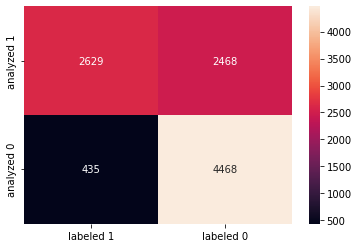

In [19]:
con_df = pd.DataFrame(confusion_matrix(amz_df['label'], amz_df['compound_str']), columns=['labeled 1', 'labeled 0'], index=['analyzed 1', 'analyzed 0'])
sns.heatmap(con_df, annot=True, fmt='g')